In [2]:
import pandas as pd
data_url = "c:\data\child_population.xlsx"
data = pd.read_excel(data_url)
data

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,총인구중 아동(0~17세) 인구 구성비,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,단위:,"명, %",NaN,NaN,NaN,NaN
1,NaN,2019,2020,2021,2022,2023
2,총 인구수,"51,849,861","51,829,023","51,638,109","51,439,038","51,325,329"
3,아동 인구수,"7,928,907","7,710,946","7,483,944","7,271,460","7,077,206"
4,비율(구성비),15,15,15,14,14
5,출처:,주민등록인구통계,NaN,NaN,NaN,NaN


In [3]:
population = data.iloc[2:4, :]
population

,통계표명:,총인구중 아동(0~17세) 인구 구성비,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,총 인구수,"51,849,861","51,829,023","51,638,109","51,439,038","51,325,329"
3,아동 인구수,"7,928,907","7,710,946","7,483,944","7,271,460","7,077,206"


In [4]:
listTmp = list(population.columns)
listTmp[0] = '구분'
listTmp[1] = '2019'
listTmp[2] = '2020'
listTmp[3] = '2021'
listTmp[4] = '2022'
listTmp[5] = '2023'
population.columns = listTmp
population

,구분,2019,2020,2021,2022,2023
2,총 인구수,"51,849,861","51,829,023","51,638,109","51,439,038","51,325,329"
3,아동 인구수,"7,928,907","7,710,946","7,483,944","7,271,460","7,077,206"


In [5]:
population = population.set_index('구분')
population

,2019,2020,2021,2022,2023
구분,,,,,
총 인구수,"51,849,861","51,829,023","51,638,109","51,439,038","51,325,329"
아동 인구수,"7,928,907","7,710,946","7,483,944","7,271,460","7,077,206"


In [6]:
population = population.T
population

구분,총 인구수,아동 인구수
2019,"51,849,861","7,928,907"
2020,"51,829,023","7,710,946"
2021,"51,638,109","7,483,944"
2022,"51,439,038","7,271,460"
2023,"51,325,329","7,077,206"


In [7]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

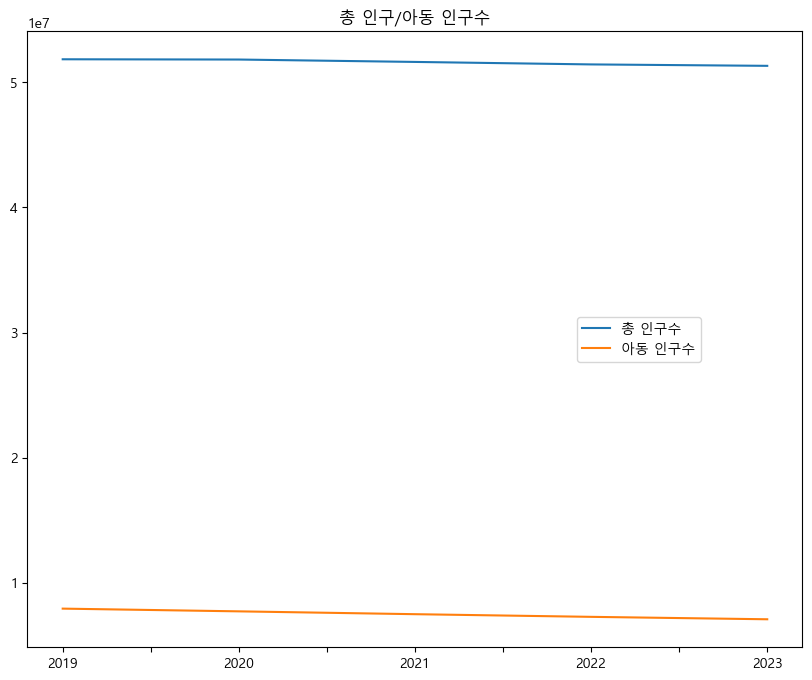

In [16]:
if population['총\xa0인구수'].dtype != 'object':
    population['총\xa0인구수'] = population['총\xa0인구수'].astype(str)

if population['아동\xa0인구수'].dtype != 'object':
    population['아동\xa0인구수'] = population['아동\xa0인구수'].astype(str)

population['총\xa0인구수'] = population['총\xa0인구수'].str.replace(',', '').astype(float)
population['아동\xa0인구수'] = population['아동\xa0인구수'].str.replace(',', '').astype(float)

population.plot(figsize=(10, 8))
plt.title('총 인구/아동 인구수')
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

population_num = population[['총\xa0인구수', '아동\xa0인구수']]
print(minMaxScaler.fit(population_num))
df_minMaxScaled = minMaxScaler.transform(population_num)
df_minmax = pd.DataFrame(df_minMaxScaled, columns=['총\xa0인구수', '아동\xa0인구수'])
df_minmax

MinMaxScaler()


,총 인구수,아동 인구수
0,1.000000,1.000000
1,0.960273,0.744087
2,0.596303,0.477560
3,0.216782,0.228078
4,0.000000,0.000000


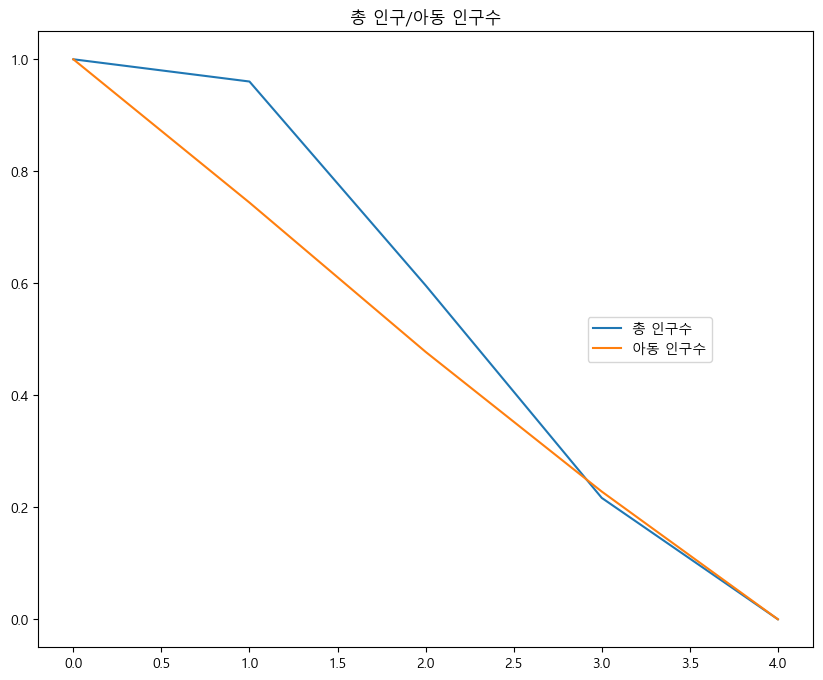

In [20]:
df_minmax.plot(figsize=(10, 8))
plt.title('총 인구/아동 인구수')
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
plt.show()

In [23]:
dataLR = population
dataLR['year'] = dataLR.index
dataLR

구분,총 인구수,아동 인구수,year
2019,51849861.0,7928907.0,2019
2020,51829023.0,7710946.0,2020
2021,51638109.0,7483944.0,2021
2022,51439038.0,7271460.0,2022
2023,51325329.0,7077206.0,2023


In [24]:
X = dataLR.iloc[:, -1:]
X

구분,year
2019,2019
2020,2020
2021,2021
2022,2022
2023,2023


In [25]:
y = dataLR.iloc[:, 0]
y

2019    51849861.0
2020    51829023.0
2021    51638109.0
2022    51439038.0
2023    51325329.0
Name: 총 인구수, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)
lr.fit(X_train, y_train)
print('훈령세트점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)

훈령세트점수: 0.92
테스트 세트 점수: 0.981954


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

for k in range(1, 4):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('train R^2 : {:.3f}'.format(knn.score(X_train, y_train)))
    print('test k : {}, R^2 : {:.3f}'.format(k, knn.score(X_test, y_test)))

train R^2 : 1.000
test k : 1, R^2 : -0.009
train R^2 : 0.643
test k : 2, R^2 : -0.949
train R^2 : 0.000
test k : 3, R^2 : -2.056


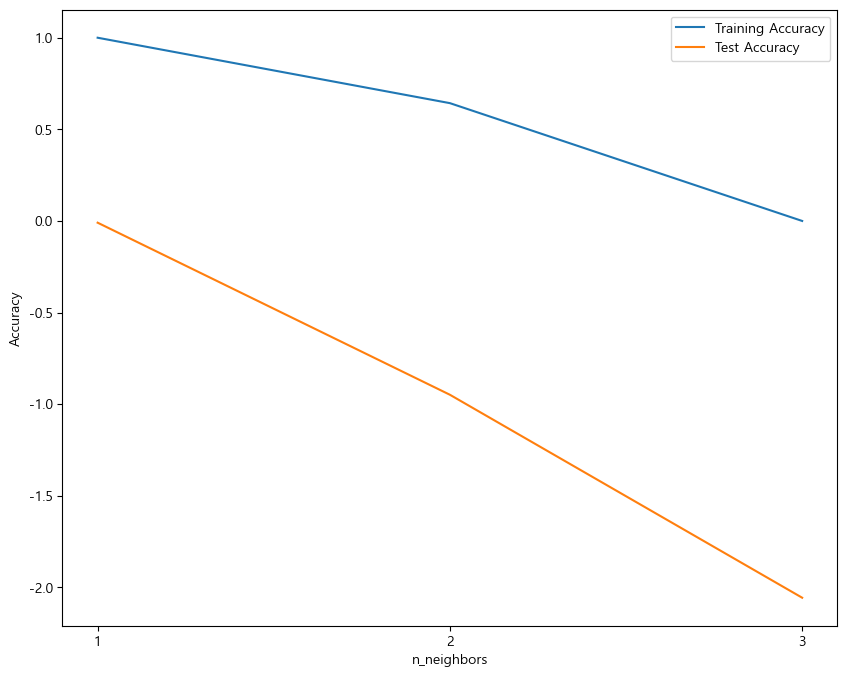

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

training_accuracy=[]
test_accuracy = []
neighbors=range(1, 4)
for k in neighbors:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(10,8))
plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(neighbors)
plt.legend()

In [42]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

-0.009449485856107387

In [43]:
knn.predict([[2024]])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([51439038.])